# Import necessary libraries and dataset

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [59]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = pd.read_excel(r'C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone\Model_V5\FullTrainingSet\ClassifierReady\PiotroskyTraining_ClassifierReady.xlsx', header=0, parse_dates=[0])
features = features[features.Fscore > 8]
# features.head()


In [60]:
features = features.dropna()

# Labels are the values we want to predict
labels = np.array(features['Outperform'])
int_labels = labels

In [61]:
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('Outperform', axis=1)
features = features.drop(columns=['Unnamed: 0', 'Quarter Date','Security', 'Name', 'Sector', 'ClosingPrice', 'StartingPrice', 'OneYearPrice', 'TwoYearPrice', 'OneYearReturn', 'TwoYearReturn', 'Underperform'])

feature_list = list(features.columns)

In [62]:

features =features.iloc[np.random.permutation(len(features))]
features = features.reset_index(drop=True)

# Convert to numpy array
features = np.array(features)

In [64]:
features

array([[ 1.        ,  1.        ,  1.        , ...,  9.        ,
         5.67638056,  0.55980084],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
         1.61890911,  0.04577068],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        12.5958486 ,  0.31767588],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        12.0826302 ,  0.16080157],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        28.51851107,  0.93626103],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        22.17824959,  0.70153051]])

In [34]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, int_labels, test_size = 0.1, random_state = 42)

In [54]:
features

array([[ 1.        ,  1.        ,  1.        , ...,  9.        ,
         8.34544617,  0.39039883],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
         8.96270447,  0.36096273],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        11.39542848,  0.30218585],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
         4.45975653,  0.07002287],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
        12.0826302 ,  0.16080157],
       [ 1.        ,  1.        ,  1.        , ...,  9.        ,
         9.04345319,  0.35353609]])

In [35]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (164, 12)
Training Labels Shape: (164,)
Testing Features Shape: (19, 12)
Testing Labels Shape: (19,)


In [36]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Average CV score on the training set was: 0.5904761904761905
rf = RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=16, min_samples_split=4, n_estimators=100)

In [38]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [39]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [53]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

## Accuracy

In [40]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.6842105263157895


## Salient Variables

In [41]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BOOK_VAL_PER_SH      Importance: 0.54
Variable: BM                   Importance: 0.46
Variable: ROA                  Importance: 0.0
Variable: CFO                  Importance: 0.0
Variable: ROA_Change           Importance: 0.0
Variable: Accrual              Importance: 0.0
Variable: LT_Debt_To_Asset_change Importance: 0.0
Variable: Current_Ratio_Change Importance: 0.0
Variable: No_Shares_Change     Importance: 0.0
Variable: Gross_Margin_Change  Importance: 0.0
Variable: Asset_Turnover_Change Importance: 0.0
Variable: Fscore               Importance: 0.0


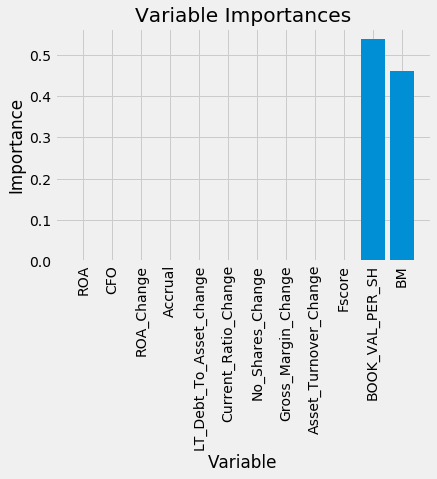

In [42]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

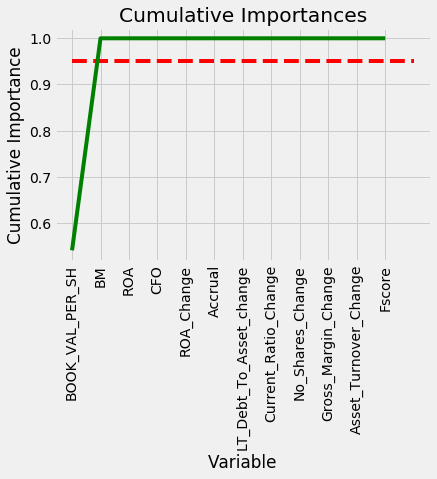

In [43]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [44]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for above 90% importance:', np.where(cumulative_importances > 0.9)[0][0] + 1)

Number of features for above 90% importance: 2


In [45]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:2]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Analyze shape of training and test set
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (164, 2)
Important test features shape: (19, 2)


In [46]:
# Train the expanded model on only the important features
rf.fit(important_train_features, train_labels);
# Make predictions on test data
predictions2 = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions2 - test_labels)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')


Average absolute error: 0.37 degrees.


In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions2))

Accuracy: 0.631578947368421


# Try on Test Data - 2018 Quarterly Data

In [48]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
Test = pd.read_excel(r'C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone\Model_V5\FullTestSet\ClassifierReady\PiotroskyTest_ClassifierReady.xlsx', header=0, parse_dates=[0])
Test = Test[Test.Fscore > 8]
Test = Test[['Outperform','BOOK_VAL_PER_SH', 'BM']]


In [49]:
# whatsgood = whatsgood.replace([np.inf, -np.inf], np.nan)
Test = Test.dropna()
# whatsgood["target"].replace({"Underperform": 1, "Outperform": 0}, inplace=True)
Test["Outperform"] = pd.to_numeric(Test["Outperform"])
Test =Test.iloc[np.random.permutation(len(Test))]
Test=Test.reset_index(drop=True)

In [50]:
Findout_class  = Test['Outperform'].values

In [51]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(Test.index,
                                                                                            stratify = Findout_class,
                                                                                            train_size=0.1, test_size=0.9)

training_indices.size, validation_indices.size

(6, 56)

## Performance on Test Data

In [52]:
rf.score(Test.drop('Outperform',axis=1).loc[validation_indices].values,
           Test.loc[validation_indices, 'Outperform'].values)

0.5714285714285714

# Use Random Forest to predict which securities 200Q4 could outperform their peers 1 year from now

In [85]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
df = pd.read_excel(r"C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone\Model_V5\2020Q2\Piotrosky2020_Analysis.xlsx")
df = df[df.Fscore > 8]
df_2020QF = df
df_2020QF = df_2020QF[['Outperform','BOOK_VAL_PER_SH', 'BM']]
# features.head()

# df_2020QF = df_2020QF.dropna()

# Labels are the values we want to predict
labels2020Q4 = np.array(df_2020QF['Outperform'])
int_labels2020Q4 = labels2020Q4

df_2020QF = df_2020QF.drop('Outperform', axis=1)
# df_2020QF = df_2020QF.drop(columns=['Quarter Date','Security', 'Name', 'Sector', 'ClosingPrice', 'StartingPrice', 'OneYearPrice', 'TwoYearPrice', 'OneYearReturn', 'TwoYearReturn', 'Underperform'])

feature_list2020Q4 = list(df_2020QF.columns)

df_2020QF =df_2020QF.iloc[np.random.permutation(len(df_2020QF))]
df_2020QF = df_2020QF.reset_index(drop=True)

# Convert to numpy array
df_2020QF = np.array(df_2020QF)

In [86]:
df_2020QF

array([[ 3.06638998e+01,  4.10823952e-01],
       [ 1.45831371e+01,  2.69260285e-01],
       [ 1.59915268e+01,  2.02066297e-01],
       [ 2.26687500e+01,  5.20749581e-02],
       [ 1.61312794e+01,  2.60897290e-01],
       [ 3.86407767e+00,  5.37050406e-02],
       [ 5.26576154e+00,  2.46063623e-01],
       [ 1.85756777e+01,  6.29683989e-01],
       [-4.90023474e-01, -3.46673841e-03],
       [ 2.96885965e+00,  2.33034509e-01],
       [ 1.14212432e+01,  3.00638147e-01],
       [ 3.76168611e+01,  6.34455408e-01],
       [ 3.84571743e+00,  4.07817330e-01],
       [ 1.81371961e+01,  4.97181910e-02],
       [ 1.76490966e+01,  1.75264117e+00],
       [ 7.22697056e+00,  4.13324024e-02],
       [ 1.43506504e+02,  2.81363235e-01],
       [ 1.62790179e+01,  3.09958451e-01]])

,Quarter Date,Security,Name,Sector,ROA,CFO,ROA_Change,Accrual,LT_Debt_To_Asset_change,Current_Ratio_Change,...,BOOK_VAL_PER_SH,ClosingPrice,BM,StartingPrice,OneYearPrice,TwoYearPrice,OneYearReturn,TwoYearReturn,Outperform,Underperform
12,2020-06-30,AAPL UW Equity,Apple Inc,Technology,1.0,1.0,1.0,1.0,1.0,1.0,...,18.137196,364.80,0.049718,364.80,NaN,NaN,NaN,NaN,NaN,NaN
45,2020-06-30,ADBE UW Equity,Adobe Inc,Technology,1.0,1.0,1.0,1.0,1.0,1.0,...,22.668750,435.31,0.052075,435.31,NaN,NaN,NaN,NaN,NaN,NaN
443,2020-06-30,BZH UN Equity,Beazer Homes USA Inc,"Consumer, Cyclical",1.0,1.0,1.0,1.0,1.0,1.0,...,17.649097,10.07,1.752641,10.07,NaN,NaN,NaN,NaN,NaN,NaN
558,2020-06-30,CHTR UW Equity,Charter Communications Inc,Communications,1.0,1.0,1.0,1.0,1.0,1.0,...,143.506504,510.04,0.281363,510.04,NaN,NaN,NaN,NaN,NaN,NaN
563,2020-06-30,CIEN UN Equity,Ciena Corp,Communications,1.0,1.0,1.0,1.0,1.0,1.0,...,14.583137,54.16,0.269260,54.16,NaN,NaN,NaN,NaN,NaN,NaN
833,2020-06-30,DVA UN Equity,DaVita Inc,"Consumer, Non-cyclical",1.0,1.0,1.0,1.0,1.0,1.0,...,15.991527,79.14,0.202066,79.14,NaN,NaN,NaN,NaN,NaN,NaN
954,2020-06-30,EVRG UN Equity,Evergy Inc,Utilities,1.0,1.0,1.0,1.0,1.0,1.0,...,37.616861,59.29,0.634455,59.29,NaN,NaN,NaN,NaN,NaN,NaN
992,2020-06-30,FC UN Equity,Franklin Covey Co,"Consumer, Non-cyclical",1.0,1.0,1.0,1.0,1.0,1.0,...,5.265762,21.40,0.246064,21.40,NaN,NaN,NaN,NaN,NaN,NaN
1008,2020-06-30,FELE UW Equity,Franklin Electric Co Inc,Industrial,1.0,1.0,1.0,1.0,1.0,1.0,...,16.279018,52.52,0.309958,52.52,NaN,NaN,NaN,NaN,NaN,NaN
1427,2020-06-30,ITW UN Equity,Illinois Tool Works Inc,Industrial,1.0,1.0,1.0,1.0,1.0,1.0,...,7.226971,174.85,0.041332,174.85,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Use the forest's predict method on the test data
predictions2020QF = rf.predict(df_2020QF)

In [89]:
predictions2020QF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [90]:
df['Security'] # Looks like we have to get rid of MWA

12      AAPL UW Equity
45      ADBE UW Equity
443      BZH UN Equity
558     CHTR UW Equity
563     CIEN UN Equity
833      DVA UN Equity
954     EVRG UN Equity
992       FC UN Equity
1008    FELE UW Equity
1427     ITW UN Equity
1488     KMB UN Equity
1701    MINI UW Equity
1796     MWA UN Equity
1901    NVEC UR Equity
1983    OSIS UW Equity
2110     PNR UN Equity
2631     TPX UN Equity
2775    VIAV UW Equity
Name: Security, dtype: object